# Librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Lectura

In [2]:
train_df = pd.read_csv('../data/train_df.csv')
test_df = pd.read_csv('../data/test_df.csv')

In [3]:
X_train , y_train = train_df.drop(columns=['status']), train_df.status
X_test , y_test = test_df.drop(columns=['status']), test_df.status

In [4]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,month,day_of_month,day_of_year,week_of_month,week_of_year,day_of_week,year,is_wknd,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,lead_time_transf,type_of_meal_plan_Not Selected,type_of_meal_plan_other,room_type_reserved_Room_Type 4,room_type_reserved_other,market_segment_type_Online,market_segment_type_other,avg_price_per_room_mm
0,2,0,1,2,0,0,0,0,1,3,14,73,2,11,3,2018,0,1,0,0,0,0,0,0,-0.34,1,0,0,0,1,0,0.31
1,1,0,0,2,0,0,0,0,1,8,7,219,1,32,1,2017,0,3,0,0,0,0,0,0,-1.99,0,0,0,0,1,0,0.36
2,2,0,0,2,0,0,0,0,1,10,21,294,3,42,7,2018,1,4,0,0,0,0,0,0,-0.24,0,0,0,0,1,0,0.84
3,3,0,2,1,0,0,0,0,1,9,11,254,2,37,2,2018,0,3,0,0,0,0,0,0,-0.13,0,0,1,0,1,0,0.89
4,2,1,2,5,0,0,0,0,1,3,15,74,3,11,4,2018,0,1,0,0,0,0,0,0,-0.15,0,0,1,0,1,0,0.34


# Seleccion de variables

In [5]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

Select K best

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=15)
X_kbest = kbest.fit_transform(X, y)
variables_seleccionadas = [nombre for i, nombre 
                           in enumerate(X.columns) 
                           if kbest.get_support()[i]]

variables_seleccionadas

['no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'repeated_guest',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'day_of_week',
 'year',
 'is_wknd',
 'lead_time_transf',
 'type_of_meal_plan_Not Selected',
 'market_segment_type_Online',
 'market_segment_type_other',
 'avg_price_per_room_mm']

Mutual info

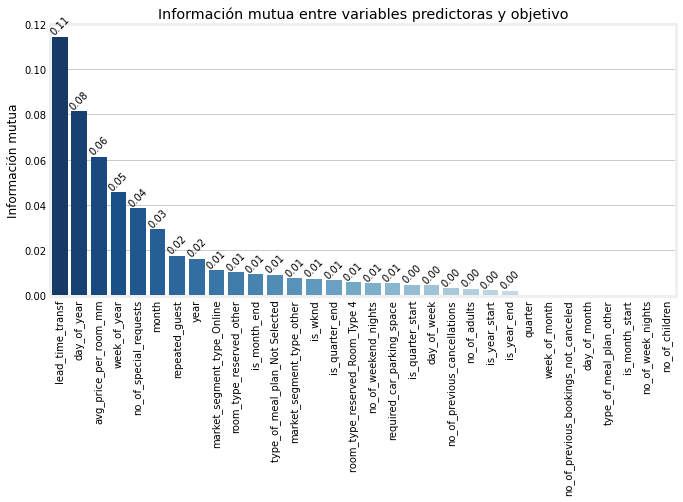

In [8]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for easy data handling
mutual_info_df = pd.Series(mutual_info)
mutual_info_df.index = X.columns

# Sort and create the bar plot using Seaborn
sorted_mutual_info_df = mutual_info_df.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sorted_mutual_info_df.index, y=sorted_mutual_info_df.values, palette='Blues_r')
ax.set_facecolor('white')
plt.xticks(rotation=90)
plt.ylabel('Información mutua')
plt.title("Información mutua entre variables predictoras y objetivo")

# Add the values at the top of each bar
for i, v in enumerate(sorted_mutual_info_df):
    if v > 0.001:
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', rotation=45)

plt.show()


Seleccion final

In [9]:
lista_mutual_info = sorted_mutual_info_df[sorted_mutual_info_df>0].index.tolist()

In [10]:
variables_finales = set(lista_mutual_info).intersection(variables_seleccionadas)

In [11]:
variables_finales

{'avg_price_per_room_mm',
 'day_of_week',
 'is_wknd',
 'lead_time_transf',
 'market_segment_type_Online',
 'market_segment_type_other',
 'no_of_special_requests',
 'no_of_weekend_nights',
 'repeated_guest',
 'required_car_parking_space',
 'type_of_meal_plan_Not Selected',
 'year'}

# Preparacion para modelos

In [12]:
X_train = X_train[variables_finales]
X_test = X_test[variables_finales]

In [13]:
X_train.columns

Index(['no_of_weekend_nights', 'year', 'market_segment_type_Online',
       'day_of_week', 'market_segment_type_other', 'no_of_special_requests',
       'required_car_parking_space', 'avg_price_per_room_mm', 'repeated_guest',
       'type_of_meal_plan_Not Selected', 'lead_time_transf', 'is_wknd'],
      dtype='object')

In [14]:
X_train.head()

,no_of_weekend_nights,year,market_segment_type_Online,day_of_week,market_segment_type_other,no_of_special_requests,required_car_parking_space,avg_price_per_room_mm,repeated_guest,type_of_meal_plan_Not Selected,lead_time_transf,is_wknd
0,1,2018,1,3,0,1,0,0.31,0,1,-0.34,0
1,0,2017,1,1,0,1,0,0.36,0,0,-1.99,0
2,0,2018,1,7,0,1,0,0.84,0,0,-0.24,1
3,2,2018,1,2,0,1,0,0.89,0,0,-0.13,0
4,2,2018,1,4,0,1,0,0.34,0,0,-0.15,0


In [15]:
X_train.shape, X_test.shape

((3599, 12), (900, 12))

Guardamos sets de entrenamiento y testeo

In [20]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)

y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

# Regresion logistica

In [66]:
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score, precision_score

seed = 42

Modelado

In [22]:
params_lr = {
    "penalty": ["l1","l2"],
    "C": [0.001,0.01,0.1,1,10,100],
    "solver": ["newton-cg", "liblinear"]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_lr = GridSearchCV(LogisticRegression(random_state=seed),
                              param_grid=params_lr,
                               scoring="roc_auc",
                               cv= kfold,
                               verbose=-1)

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='roc_auc', verbose=-1)

Resultados cross-validation

In [23]:
print(f'Mejor modelo de regrsión logística cuenta con parametros: {grid_search_lr.best_estimator_}')
print(f'El AUC es de: {round(grid_search_lr.best_score_,3)}')

Mejor modelo de regrsión logística cuenta con parametros: LogisticRegression(C=10, random_state=42, solver='newton-cg')
El AUC es de: 0.852


In [ ]:
# Extract the results from the grid search
results_df = pd.DataFrame(grid_search_lr.cv_results_)


for solver in params_lr['solver']:
    # Pivot the data to create a heatmap

    results_df_solver = results_df[results_df.param_solver==solver]
    pivot_df = results_df.pivot_table(index='param_penalty', columns='param_C', values='mean_test_score', aggfunc='mean')

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap="Blues", cbar=True, linewidths=0.5)
    plt.title(f"Grid Search Results - ROC AUC Score - {solver}")
    plt.xlabel("C")
    plt.ylabel("Penalty")
    plt.show()

# Resultados de CV Test

In [72]:
results = cross_validate(
    grid_search_lr.best_estimator_,
    X_train,
    y_train,
    cv=kfold,
    scoring=['accuracy', 'precision', 'recall', "f1", "roc_auc"],
    return_train_score=False,
    n_jobs=-1
)

results_dt = pd.DataFrame(results)

mean_results = pd.DataFrame(results_dt.mean(axis=0), columns=['values'])
mean_results

,values
fit_time,0.30
score_time,0.01
test_accuracy,0.79
test_precision,0.72
test_recall,0.62
test_f1,0.67
test_roc_auc,0.85


In [73]:
mean_results.to_csv('../data/cv_results/reg_log.csv', index=False)

# Resultados en test

In [25]:
preds = grid_search_lr.predict(X_test)
print(classification_report(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       603
           1       0.72      0.55      0.62       297

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.74       900
weighted avg       0.77      0.78      0.77       900

0.7230262827277754


# Guardamos modelo y resultados

In [47]:
resultados_dict = {
    'AUC': roc_auc_score(y_test,preds),
    'Accuracy': accuracy_score(y_test,preds),
    'Recall': recall_score(y_test,preds),
    'Precision': precision_score(y_test,preds),
    'F1_score': f1_score(y_test,preds)
}

In [56]:
resultados = pd.DataFrame(resultados_dict,index=['Resultados en test']).T

In [57]:
resultados

,Resultados en test
AUC,0.72
Accuracy,0.78
Recall,0.55
Precision,0.72
F1_score,0.62


In [58]:
resultados.to_csv('../data/resultados/reg_log.csv',index=False)

In [60]:
import pickle
pickle.dump(grid_search_lr, open('../data/modelos/reg_log.pkl', 'wb'))

In [61]:
# pickled_model = pickle.load(open('../data/modelos/reg_log.pkl', 'rb'))